In [53]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


import warnings
warnings.filterwarnings('ignore')

# Import statistics packages from SciPy
from scipy import stats
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import pearsonr


from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker

In [123]:
df_f = pd.read_csv("C.csv")
df_f.head()

,Year,Region,Estimated Population nr,Nr of Persons with Internet Access,% of Persons with Internet Access,Score_x,Score_y,Score,Calculated %,YN
0,2011,Border,784000.0,517440.0,66.0,NaN,NaN,NaN,66.0,0
1,2011,Dublin,2523000.0,2119320.0,84.0,NaN,NaN,NaN,84.0,0
2,2011,Ireland,9149700.0,7136766.0,78.0,NaN,NaN,NaN,78.0,0
3,2011,Mid-East,1314900.0,1143963.0,87.0,NaN,NaN,NaN,87.0,0
4,2011,Mid-West,933600.0,718872.0,77.0,NaN,NaN,NaN,77.0,0


In [124]:
df_f.describe(include='all')

,Year,Region,Estimated Population nr,Nr of Persons with Internet Access,% of Persons with Internet Access,Score_x,Score_y,Score,Calculated %,YN
count,207.00000,207,2.070000e+02,2.070000e+02,207.000000,99.000000,99.000000,99.000000,207.000000,207.000000
unique,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Border,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2022.00000,NaN,2.278866e+06,2.154006e+06,93.631884,0.949660,0.954059,0.895012,93.189429,0.468599
std,6.64933,NaN,2.911953e+06,2.808900e+06,9.729240,0.029115,0.033222,0.068176,9.151435,0.500223
min,2011.00000,NaN,5.676000e+05,4.248340e+05,66.000000,0.887480,0.917102,0.791709,66.000000,0.000000
25%,2016.00000,NaN,8.809500e+05,7.574650e+05,87.000000,0.934870,0.920584,0.853624,87.000000,0.000000
50%,2022.00000,NaN,1.029628e+06,1.036669e+06,94.000000,0.959383,0.941727,0.878875,94.000000,0.000000
75%,2028.00000,NaN,1.649115e+06,1.692157e+06,101.000000,0.974064,0.990327,0.967392,100.259712,1.000000


In [125]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                207 non-null    int64  
 1   Region                              207 non-null    object 
 2   Estimated Population nr             207 non-null    float64
 3   Nr of Persons with Internet Access  207 non-null    float64
 4   % of Persons with Internet Access   207 non-null    float64
 5   Score_x                             99 non-null     float64
 6   Score_y                             99 non-null     float64
 7   Score                               99 non-null     float64
 8   Calculated %                        207 non-null    float64
 9   YN                                  207 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 16.3+ KB


In [126]:
unique_region_names = df_f.Region.unique()
unique_region_names

array(['Border', 'Dublin', 'Ireland', 'Mid-East', 'Mid-West', 'Midlands',
       'South-East', 'South-West', 'West'], dtype=object)

**Observations**

We have 3 values predicted by ML algorithm:
1. Estimated Population number
2. Number of People having Internet Access
3. % of People having Internet Access

All 3 values are related to future years and Irelad's regions, including whole county.

From the description we can see that we have data for 8 regions plus the county and 11 years (from 2023 to 2033)

Mean value for the % of people having internet access is more than 100%. At the same time mean value for score of prediction is lower for % of people having internet access 

**Analysis**


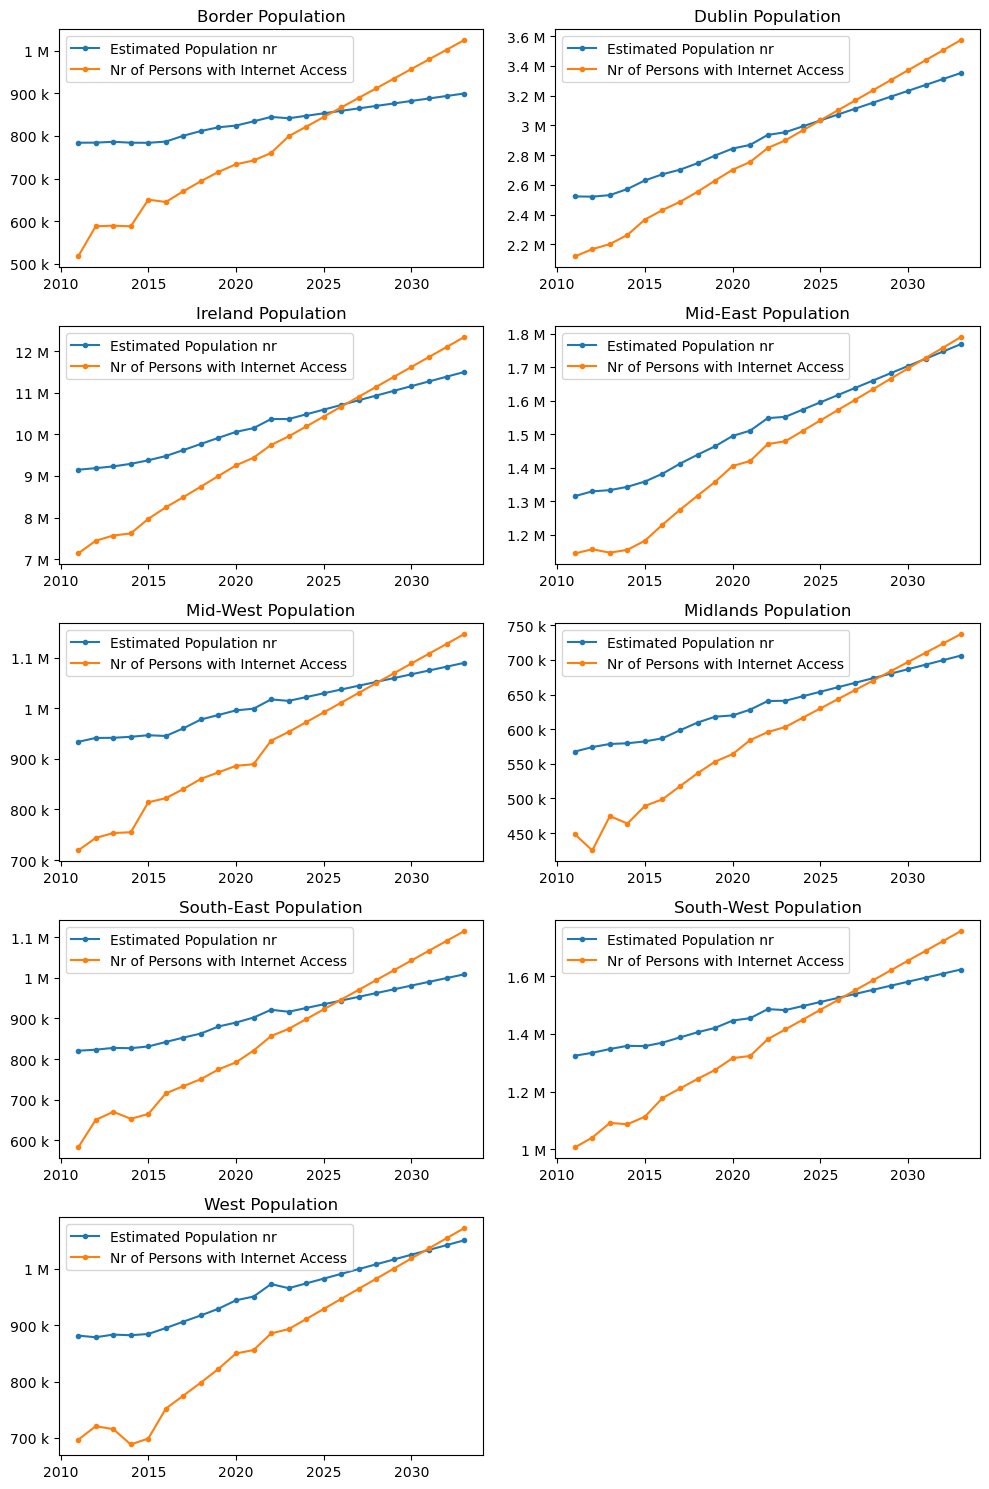

In [128]:
# Create a 2-column grid layout
gs = GridSpec(nrows=5, ncols=2)

# Create a figure
fig = plt.figure(figsize=(10, 15))

# Add subplots to the figure using the grid layout
axs = []
for i, region in enumerate(df_f['Region'].unique()):
    ax = fig.add_subplot(gs[i])
    axs.append(ax)

# Plot the graphs for each region
for i, region in enumerate(df_f['Region'].unique()):
    ax = axs[i]

    # Get the subset of the data frame for the current region
    df_region = df_f[df_f['Region'] == region]

    # Plot the graph for the current region
    ax.plot(df_region['Year'], df_region['Estimated Population nr'],'.-', label='Estimated Population nr')   
    ax.plot(df_region['Year'], df_region['Nr of Persons with Internet Access'],'.-', label='Nr of Persons with Internet Access')
    ax.set_title(f'{region} Population')
    ax.legend(loc='upper left')

    # Set the Y axis scale to have readable format for numbers
    formatter = ticker.EngFormatter()
    ax.yaxis.set_major_formatter(formatter)
    
# Adjust the layout of the figure
fig.tight_layout()

# Show the plot
plt.show()

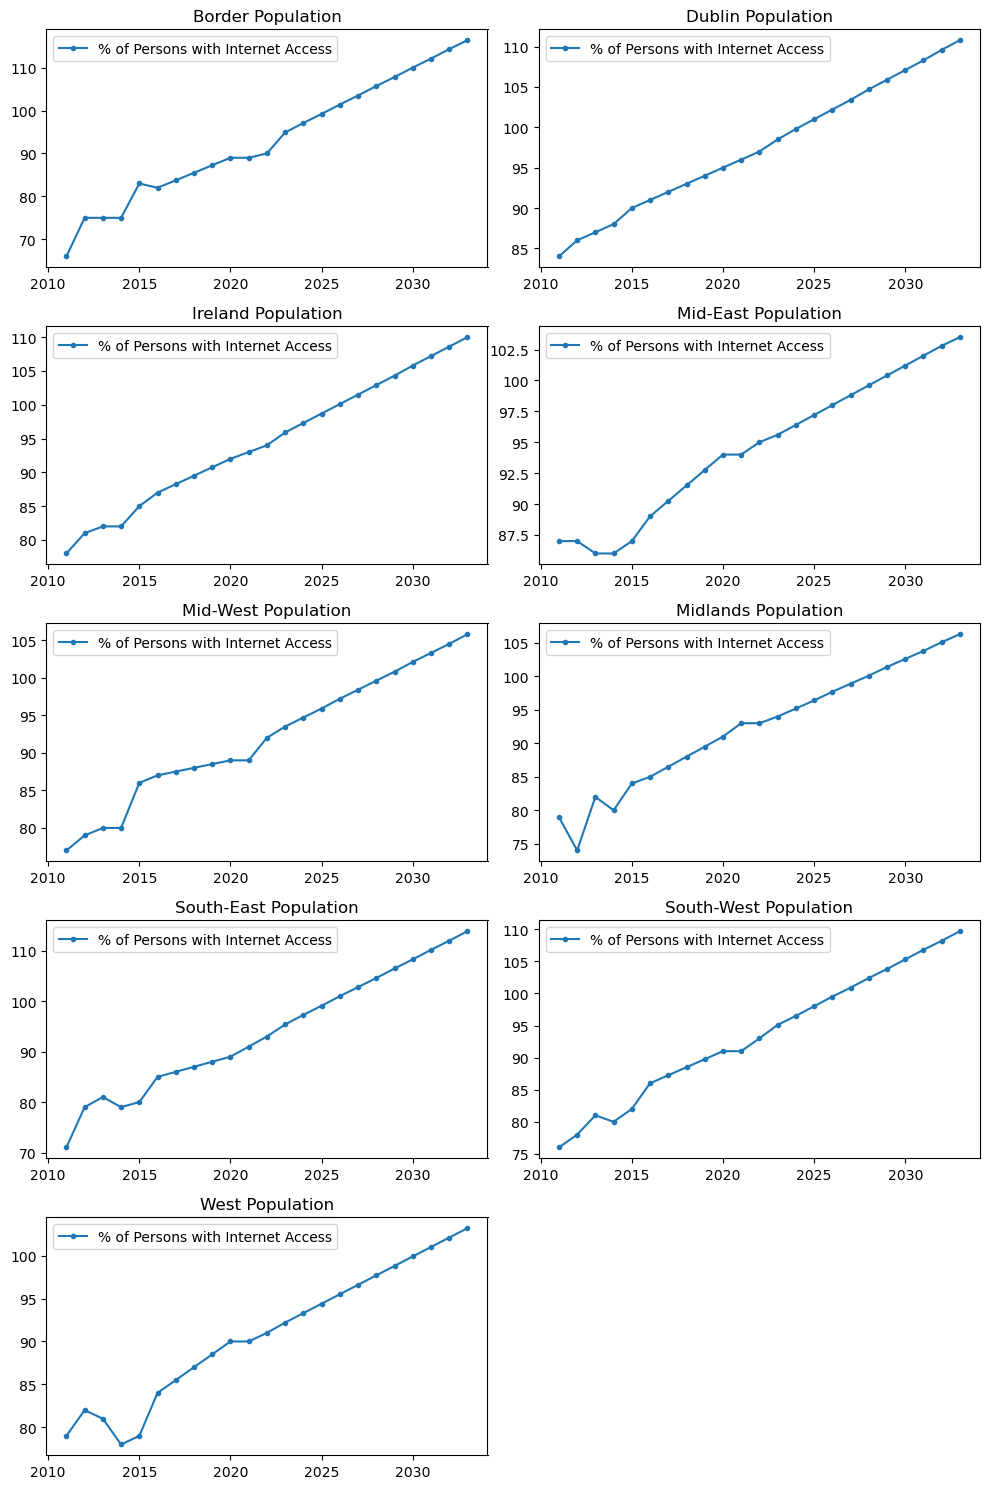

In [129]:
# Create a 2-column grid layout
gs = GridSpec(nrows=5, ncols=2)

# Create a figure
fig = plt.figure(figsize=(10, 15))

# Add subplots to the figure using the grid layout
axs = []
for i, region in enumerate(df_f['Region'].unique()):
    ax = fig.add_subplot(gs[i])
    axs.append(ax)

# Plot the graphs for each region
for i, region in enumerate(df_f['Region'].unique()):
    ax = axs[i]

    # Get the subset of the data frame for the current region
    df_region = df_f[df_f['Region'] == region]

    # Plot the graph for the current region
    ax.plot(df_region['Year'], df_region['% of Persons with Internet Access'],'.-', label='% of Persons with Internet Access')   
    ax.set_title(f'{region} Population')
    ax.legend(loc='upper left')

    # Set the Y axis scale to have readable format for numbers
    formatter = ticker.EngFormatter()
    ax.yaxis.set_major_formatter(formatter)
    
# Adjust the layout of the figure
fig.tight_layout()

# Show the plot
plt.show()

In [136]:
df_filter = pd.DataFrame(df_f,columns=['Year','Region','Estimated Population nr'])

In [137]:
df_filter.describe()

,Year,Estimated Population nr
count,207.00000,2.070000e+02
mean,2022.00000,2.278866e+06
std,6.64933,2.911953e+06
min,2011.00000,5.676000e+05
25%,2016.00000,8.809500e+05
50%,2022.00000,1.029628e+06
75%,2028.00000,1.649115e+06
max,2033.00000,1.149817e+07


In [138]:
df_filter['93 % of Persons with Internet Access'] = df_filter['Estimated Population nr']*0.93

In [139]:
df_filter

,Year,Region,Estimated Population nr,93 % of Persons with Internet Access
0,2011,Border,7.840000e+05,7.291200e+05
1,2011,Dublin,2.523000e+06,2.346390e+06
2,2011,Ireland,9.149700e+06,8.509221e+06
3,2011,Mid-East,1.314900e+06,1.222857e+06
4,2011,Mid-West,9.336000e+05,8.682480e+05
...,...,...,...,...
202,2029,South-East,9.717865e+05,9.037614e+05
203,2030,South-East,9.809847e+05,9.123158e+05
204,2031,South-East,9.901830e+05,9.208702e+05
205,2032,South-East,9.993812e+05,9.294245e+05


In [184]:
def binomial_probability(n, p, k):
    return binom.pmf(k, n, p)

def probability_of_greater_than_or_less_than(n, p, k):
    
    # Calculate the probability of getting k or fewer successes.
    p_less_than_or_equal_to_k = binomial_probability(n, p, k)
    
    # Calculate the probability of getting greater than k successes.
    p_greater_than_k = 1 - p_less_than_or_equal_to_k
    
    return p_greater_than_k
data=[]
for region in unique_region_names:
    df = df_f.drop(df_f[(df_f["Region"] != region) ].index)
    for year in df["Year"][:-1]:
        n = round(df.loc[(df.Year == year) & (df.Region == region),'Estimated Population nr'].iloc[0])
        p1 = df.loc[(df.Year == year+1) & (df.Region == region),'% of Persons with Internet Access'].iloc[0]
        p = round(p1/100,2)
        k = round(df_filter.loc[(df_filter.Year == year) & (df_filter.Region == region),'93 % of Persons with Internet Access'].iloc[0])
        probability = probability_of_greater_than_or_less_than(n, p, k)
        binomial = binomial_probability(n, p, k)
        if p >=0.93:
            row = [year, region, binomial,probability]
            data.append(row)
            break              

In [185]:
binomial = pd.DataFrame(data,columns=['Year','Region','Binomial Distribution','93% or more'])

In [186]:
binomial.head()

,Year,Region,Binomial Distribution,93% or more
0,2022,Border,0.000000,1.000000
1,2017,Dublin,0.000951,0.999049
2,2020,Ireland,0.000493,0.999507
3,2018,Mid-East,0.001304,0.998696
4,2022,Mid-West,0.000000,1.000000


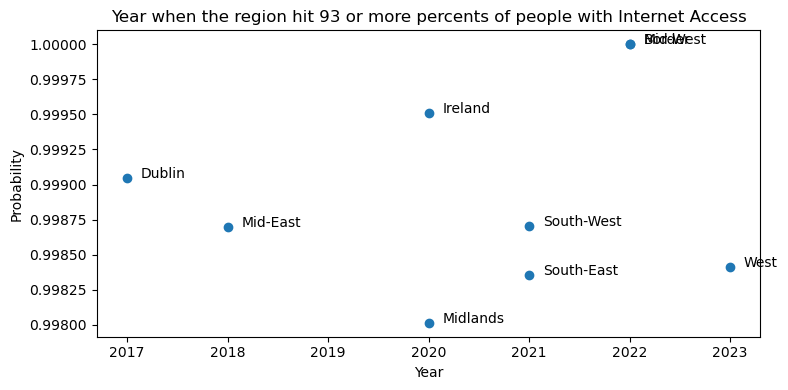

In [212]:
fig = plt.figure(figsize=(8, 4))
# Create a line plot
plt.scatter(binomial['Year'], binomial['93% or more'],label="Region")

#plt.annotate(df.Region[])

# Get the lists of years, region names, and percents
years = binomial["Year"].tolist()
region_names = binomial["Region"].tolist()
percents = binomial["93% or more"].tolist()

# Loop through the data and add an annotation for each data point
for i in range(len(years)):
    plt.annotate(region_names[i], (years[i], percents[i]), xytext=(10, 0), textcoords='offset points')

# Set the x-axis and y-axis labels
plt.xlabel("Year")
plt.ylabel("Probability")

# Set the title of the graph
plt.title("Year when the region hit 93 or more percents of people with Internet Access")

fig.tight_layout()

# Show the plot
plt.show()